In [9]:
print len("999999999999999999999999999999999999999999999999999999999999999999999999999999990999999999999999999999999999999999999999999999990999099999999990000099000009990999999909999999999099999999999999999909099999999999000099999999999999999999999999999999999999999999999990999999999999999999990909099909099999999990999999999999999999999999999999999999999999999999999999999999009999999090000900000099990999009999000000990009000099000909009900909000090909000009000090000000000000000900009000000009000009900000000009000909009090099009000990000000000000000000000900900009000090000009900000000009000000000000000000900000000000000000000000090000009000009000000000000000000009000000909909900090000000009909000000000900900000000090900900000000000000000000000000900000000090009999999999999999999999999999999999999999999990999999999999999999999999999999999999999999999999999999999909909999999999999999999999999999999999999999999999999999999999999999000000000000090090900000000900000000000000000000900000900090000090000000900009999909000999090999909999999999909909999999999909999999990999999999990999999999909999999999999999990099000999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999099909999099999999999999909999999999999999999990909999909999990990099999099990990999999999990099999999999999999099099999990999999090999")

print len("99999999999999999999999999999999999999999999999999999999999999999999999999999999099999999999999999999999999999999999999999999999099909999999999000009900000999099999990999999999909999999999999999990909999999999900009999999999999999999999999999999999999999999999999099999999999999999999090909990909999999999099999999999999999999999999999999999999999999999999999999999900999999909000090000009999099900999900000099000900009900090900990090900009090900000900009000000000000000090000900000000900000990000000000900090900909009900900099000000000000000000000090090000900009000000990000000000900000000000000000090000000000000000000000009000000900000900000000000000000000900000090990990009000000000990900000000090090000000009090090000000000000000000000000090000000009000999999999999999999999999999999999999999999999099999999999999999999999999999999999999999999999999999999990990999999999999999999999999999999999999999999999999999999999999999900000000000009009090000000090000000000000000000090000090009000009000000090000999990900099909099990999999999990990999999999990999999999099999999999099999999990999999999999999999009900099999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999")

1638
1502


In [6]:
%%writefile /mnt/solexa/mel_yang/aPlateau/outf3/rev_SIBB/calcoutf3.py

import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
from multiprocessing import Pool

agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4","XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Lajigai2","Wenpuju03","Jinchankou0",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]

def dof3work(allids,name,tv=""):
    pD="/public/adna/hongru_wang/"
    outpD="/mnt/solexa/mel_yang/aPlateau/outf3/rev_SIBB/"
    fh = 'UPA_all14'
    if tv=="tv": subset = 'transv.X_Mbuti_S1_%s_S2_%s' % (name,name)
    else: subset = 'X_Mbuti_S1_%s_S2_%s' % (name,name)
    
    AB = [(i,j) for i in allids for j in allids if i != j ]
    Xs = ["Mbuti"]
    
    pm.f3popfile(AB, Xs, pD+fh, subset)
    if tv=="tv": pm.f3parfile(pD,fh,subset,popfh=fh,badsnp="%s.transi.snp" % fh)
    else: pm.f3parfile(pD,fh,subset,popfh=fh)
    outfile = open(outpD+fh+'.f3.'+subset+".log",'w')
    mycommand1='mv '+pD+fh+'.f3.'+subset+'.par '+outpD+fh+'.f3.'+subset+'.par'
    varfile = Popen(mycommand1.split())
    varfile.communicate()
    mycommand = 'qp3Pop -p '+outpD+fh+'.f3.'+subset+'.par'
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = outfile)
    varfile.communicate()
    outfile.close()
dof3work(agq,'aGQ')
dof3work(agq,'aGQ',tv="tv")


Overwriting /mnt/solexa/mel_yang/aPlateau/outf3/rev_SIBB/calcoutf3.py


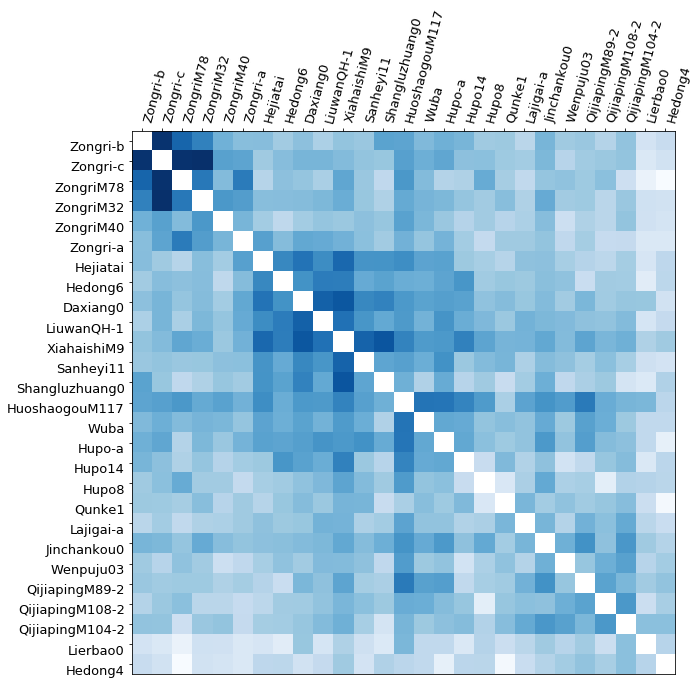

In [127]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt

pD="/mnt/solexa/mel_yang/aPlateau/outf3/rev_SIBB/"
fh="UPA_all14.f3.X_Mbuti_S1_aGQ_S2_aGQ.log"

agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4","XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Lajigai2","Wenpuju03","Jinchankou0",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM32","ZongriM40","Zongri-a",
     "Hejiatai","Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Shangluzhuang0",
     "HuoshaogouM117","Wuba","Hupo-a","Hupo14","Hupo8","Qunke1","Lajigai-a",
     "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2","Lierbao0","Hedong4",]

#agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4",
#     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
#     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Wenpuju03","Jinchankou0",
#     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]
##<100k SNPs in 2.2M: "Lajigai2","XiahaishiM22",

pops,name=agq,"aGQ"
out="Mbuti"
mypops1=[pops,pops,out]
DorZ="f3"

newfh1=fh.split(".log")[0]+"."+DorZ+"."+"%s_%s_%s" % (name,name,out)
f3ary = pm.mkf3ary(pD,fh,mypops1,2,(0,1),DorZ)    
#print pm.Zmat2xlsx(f3ary,pD+newfh1,pops,pops,0,1)

fig,ax = plt.subplots(figsize=(10,10))
fs=13
plt.imshow(f3ary, cmap='Blues', interpolation='nearest')
# We want to show all ticks...
ax.set_xticks(np.arange(len(mypops1[0])))
ax.set_yticks(np.arange(len(mypops1[1])))
# ... and label them with the respective list entries

ax.set_xticklabels(mypops1[0], minor=False,fontsize=fs,rotation=75,ha='left')
ax.set_yticklabels(mypops1[1], minor=False,fontsize=fs,va='top')
#ax.invert_yaxis()
ax.xaxis.tick_top()
plt.show()

In [124]:
print np.nanmean(f3ary), np.nanstd(f3ary)
print 

group=["Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9"]
groupind=[agq.index(i) for i in group]
print groupind
subary=f3ary[groupind,:][:,groupind]
print np.nanmean(subary), np.nanstd(subary)
print 

group1=["Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9"]
group2=[i for i in agq if i not in group1]
groupind1=[agq.index(i) for i in group1]
groupind2=[agq.index(i) for i in group2]
print groupind2
subary=f3ary[groupind1,:][:,groupind2]
print np.nanmean(subary), np.nanstd(subary)
print 

print "DX Cl vs Y"
group1=["Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9"]
group2=["Sanheyi11","Hupo-a","Hupo14","Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","HuoshaogouM117","Lierbao0"]
groupind1=[agq.index(i) for i in group1]
groupind2=[agq.index(i) for i in group2]
print groupind2
subary=f3ary[groupind1,:][:,groupind2]
print np.nanmean(subary), np.nanstd(subary)
print

group1=["Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9"]
group2=["XiahaishiM22"]
groupind1=[agq.index(i) for i in group1]
groupind2=[agq.index(i) for i in group2]
print groupind2
subary=f3ary[groupind1,:][:,groupind2]
print np.nanmean(subary), np.nanstd(subary)
print

print 'within Zongri'
group1=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40"]
group2=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40"]
groupind1=[agq.index(i) for i in group1]
groupind2=[agq.index(i) for i in group2]
print groupind2
subary=f3ary[groupind1,:][:,groupind2]
print np.nanmean(subary), np.nanstd(subary)
print

print 'Zongri vs other'
group1=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40"]
group2=[i for i in agq if i not in group1]
groupind1=[agq.index(i) for i in group1]
groupind2=[agq.index(i) for i in group2]
print groupind2
subary=f3ary[groupind1,:][:,groupind2]
print np.nanmean(subary), np.nanstd(subary)
print


print 'Lierbao vs other'
group1=["Lierbao0"]
group2=[i for i in agq if i not in group1]
groupind1=[agq.index(i) for i in group1]
groupind2=[agq.index(i) for i in group2]
print groupind2
subary=f3ary[groupind1,:][:,groupind2]
print np.nanmean(subary), np.nanstd(subary)
print

print 'Hedong4 vs other'
group1=["Hedong4"]
group2=[i for i in agq if i not in group1]
groupind1=[agq.index(i) for i in group1]
groupind2=[agq.index(i) for i in group2]
print groupind2
subary=f3ary[groupind1,:][:,groupind2]
print np.nanmean(subary), np.nanstd(subary)
print

0.302226982759 0.00662655161659

[8, 9, 10, 11, 12]
0.3146671 0.00290099701654

[0, 1, 2, 3, 4, 5, 6, 7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
0.303380025 0.00559568674585

DX Cl vs Y
[13, 14, 15, 16, 17, 18, 19, 27, 28]
0.305164488889 0.0063388675912

[7]
0.3131214 0.00573032999399

within Zongri
[0, 1, 2, 3, 4, 5]
0.3121134 0.00799845161516

Zongri vs other
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
0.300175152174 0.00448082284418

Lierbao vs other
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
0.294551892857 0.00398504720656

Hedong4 vs other
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
0.295170892857 0.00451394972232



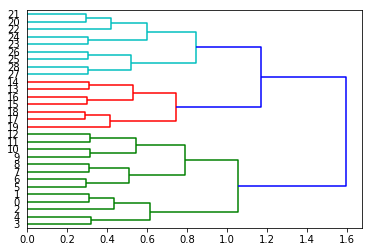

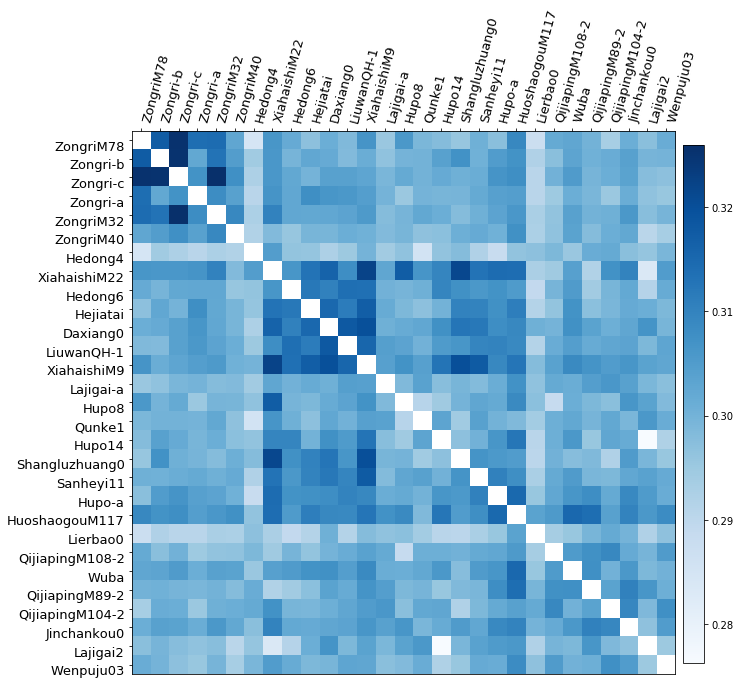

In [120]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np

f3ary1=np.triu(np.nan_to_num(f3ary))
##https://stackoverflow.com/questions/17924828/differences-in-heatmap-clustering-defaults-in-r-heatplot-versus-heatmap-2
##Euclidean and complete is like heatmap.2 in R
mydist=sch.distance.pdist(f3ary1,'euclidean') 
Y=sch.linkage(mydist,'complete')
Z=sch.dendrogram(Y,orientation='right')
index=Z['leaves']
f3ary_clust=f3ary[index,:][:,index]

#corr[f3ary1==0]=np.nan
fig,ax = plt.subplots(figsize=(10,10))
fs=13
im=ax.imshow(f3ary_clust, cmap='Blues', interpolation='nearest')
mylabels1 = [ mypops1[0][ind] for ind in index ]
mylabels2 = [ mypops1[1][ind] for ind in index ]
# We want to show all ticks...
ax.set_xticks(np.arange(len(mylabels1)))
ax.set_yticks(np.arange(len(mylabels2)))
# ... and label them with the respective list entries

ax.set_xticklabels(mylabels1, minor=False,fontsize=fs,rotation=75,ha='left')
ax.set_yticklabels(mylabels2, minor=False,fontsize=fs,va='top')
#ax.invert_yaxis()
ax.xaxis.tick_top()
cax=fig.add_axes([0.9, 0.14, 0.03, 0.72])
fig.colorbar(im,cax=cax)
plt.show()

In [77]:
import scipy
f3ary1=np.nan_to_num(f3ary)
print np.corrcoef(f3ary1)


[[  1.00000000e+00  -6.67231152e-02  -5.40804525e-02  -1.10873925e-01
   -2.83417032e-02  -5.30496101e-02   1.40150232e-02  -4.64687519e-02
   -3.31477940e-02  -6.56519752e-02  -4.83822612e-02  -4.98089119e-02
   -2.88186465e-02  -2.63766374e-02  -3.89579923e-02  -1.86899219e-02
   -1.38868828e-02   8.83512235e-03  -2.79092525e-02  -2.77121433e-02
   -1.21304917e-02   9.86253482e-05  -2.39281033e-02  -2.07472737e-02
    6.55956534e-03   5.20349481e-03  -2.09685903e-02  -3.19766605e-02
    1.23316559e-02]
 [ -6.67231152e-02   1.00000000e+00  -1.72992863e-01  -9.91239382e-02
   -8.97798791e-02  -8.08692558e-02   7.12274172e-03  -6.51760233e-02
   -2.87187596e-02  -2.42589573e-02  -1.98192075e-02  -2.96768359e-02
   -3.20601757e-02  -1.29662553e-02  -2.71016419e-02  -2.23832649e-02
    2.66589108e-03  -1.45324394e-02  -3.74462279e-02  -8.08380580e-03
   -1.42692205e-02  -2.04320838e-02  -4.85115018e-02  -1.96090044e-02
   -2.33198204e-02   9.94485256e-04  -3.55315202e-02  -3.53589114e-02


## aGQ vs aGQ

In [4]:
import numpy as np
import plateaumodules as pm

pDin="/public/adna/hongru_wang/f4/"
pDout="/mnt/solexa/mel_yang/aPlateau/update051518/"
fh,tv=("complete.dstat.log","")
#fh,tv=("complete.tv.dstat.log",".tv")
newfh="aPlateau_update051518"+tv
agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4","XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Lajigai2","Wenpuju03","Jinchankou0",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]

popA,popB,thirdpops,out=(agq,agq,agq,"Mbuti")

for myind in thirdpops:
    mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"

    newfh1=pDout+newfh+"."+DorZ+"."+"aGQ_%s_aGQ_%s" % (myind,out)
    newfh2=pDout+newfh+"."+DorZ+"."+"aGQ_aGQ_%s_%s" % (myind,out)
    Zary = pm.mkDary(pDin,fh,mypops1,(1,3),(0,2),DorZ)   
    print pm.Zmat2xlsx(Zary,newfh1,popA,popB,0,2)

    Zary = pm.mkDary(pDin,fh,mypops2,(2,3),(0,1),DorZ)    
    print pm.Zmat2xlsx(Zary,newfh2,popA,popB,0,1)

Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_Zongri-a_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Zongri-a_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_ZongriM32_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_ZongriM32_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_Zongri-c_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Zongri-c_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_ZongriM78_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_ZongriM78_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_Zongri-b_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Zongri-b_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/u

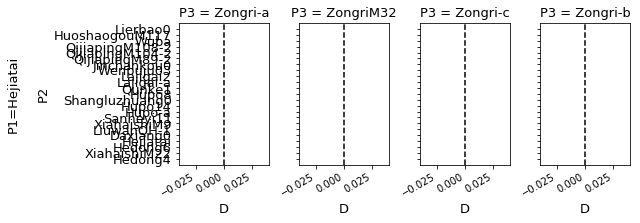

In [125]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/"
fhall="aPlateau.dstat.log"
fhtv="aPlateau.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

#fhtv="aPlateau.dstat.log"
#out,out2=("Mbuti","Chimp")

pDin="/public/adna/hongru_wang/f4/"
pDout="/mnt/solexa/mel_yang/aPlateau/update051518/"
fh,tv=("complete.dstat.log","")
#fh,tv=("complete.tv.dstat.log",".tv")
newfh="aPlateau_update051518"+tv
agq=["Hedong4","XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Lajigai2","Wenpuju03","Jinchankou0",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]

wantedcolors=["blue"]*len(agq)
myxmin=[-0.04]*8
myxmax=[0.04]*8
#myxmin=[-0.02]*5
#myxmax=[0.06]*5
mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(9,3.2))
#popA=['Zongri1a',"Shangluzhuang","Hejiatai","Daxiang"]
#popA=["Han","Ami","Dai","Daur"] 
popA=["Zongri-a","ZongriM32","Zongri-c","Zongri-b"]
popB=agq
mynames=agq
myind="Hejiatai"
varypops=popA #outs
ypops=popB
mytuples=[(0,3),(1,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[myind,ypops,[varypop],out]

    Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
    Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
    Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)" % (mypops2[0][0],mypops2[1],'EAS',mypops2[3])
    mylabel="P3 = %s" % mypops2[2][0]

    
    
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        ax1.errorbar(Darytv[ind][0],ind,xerr=SEarytv[ind][0],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[ind][0],ind,xerr=2*SEarytv[ind][0],color=wantedcolors[ind],alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[ind][0],ind,xerr=SEaryall[ind][0],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[ind][0],ind,xerr=2*SEaryall[ind][0],color=wantedcolors[ind],markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("P1=%s\n\nP2" % mypops2[0],rotation=90,fontsize=13)
        ax1.set_yticklabels(mynames,fontsize=13)
    else: 
        ax1.set_yticklabels([' ']*(len(mynames)),fontsize=1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    #xlabel = ax1.get_xticks().tolist()
    #print xlabel
    #ax1.set_xticklabels(xlabel,rotation=45,fontsize=15)

    ax1.set_title(mylabel,fontsize=13)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    #for myline in [3.5]:
    #    ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.show()

## D(aGQ, aGQ; TY/EAS, Mbuti)

In [5]:
import numpy as np
import plateaumodules as pm

pDin="/public/adna/hongru_wang/f4/"
pDout="/mnt/solexa/mel_yang/aPlateau/update051518/"
fh,tv=("complete.dstat.log","")
#fh,tv=("complete.tv.dstat.log",".tv")
newfh="aPlateau_update051518"+tv
agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4","XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Lajigai2","Wenpuju03","Jinchankou0",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]
eas=["Oroqen","Hezhen","Daur","Xibo","Tu","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi"] #,"Tibetan","Sherpa"
tib=["Tibetan_Chamdo","Tibetan_Lhasa","Tibetan_Nagqu","Tibetan_Nyingchi","Tibetan_Shannan","Tibetan_Shigatse"]


popA,popB,thirdpops,out=(agq,agq,eas+tib+["Tianyuan"],"Mbuti")

for myind in thirdpops:
    mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"

    #newfh1=pDout+newfh+"."+DorZ+"."+"aGQ_%s_aGQ_%s" % (myind,out)
    newfh2=pDout+newfh+"."+DorZ+"."+"aGQ_aGQ_%s_%s" % (myind,out)
    #Zary = pm.mkDary(pDin,fh,mypops1,(1,3),(0,2),DorZ)   
    #print pm.Zmat2xlsx(Zary,newfh1,popA,popB,0,2)

    Zary = pm.mkDary(pDin,fh,mypops2,(2,3),(0,1),DorZ)    
    print pm.Zmat2xlsx(Zary,newfh2,popA,popB,0,1)

Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Oroqen_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Hezhen_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Daur_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Xibo_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Tu_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Japanese_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Korean_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Han_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_She_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aGQ_aGQ_Miao_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/update051518/aPlateau_update051518.Z.aG

/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_Zongri-a_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_ZongriM32_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_Zongri-c_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_ZongriM78_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_Zongri-b_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_ZongriM40_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_Hedong4_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_XiahaishiM22_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_Hedong6_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_Hejiatai_Mbuti_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_D_EASTIB_EASTIB_Daxiang0_Mbuti_heatmap.png
/mnt/

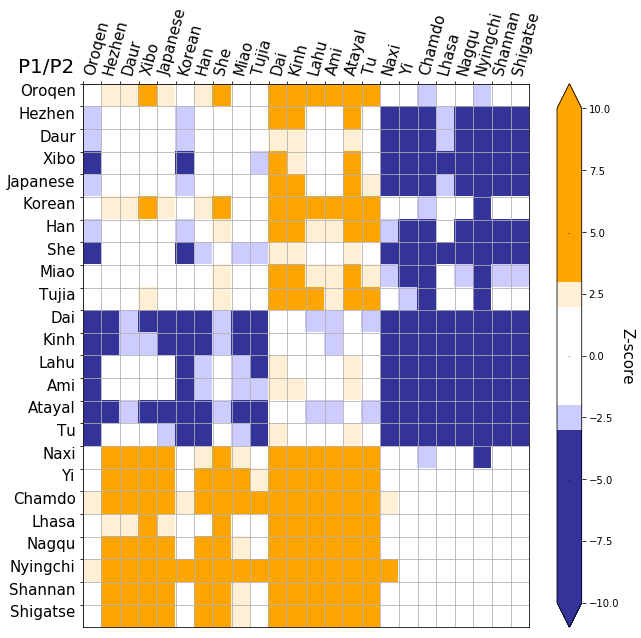

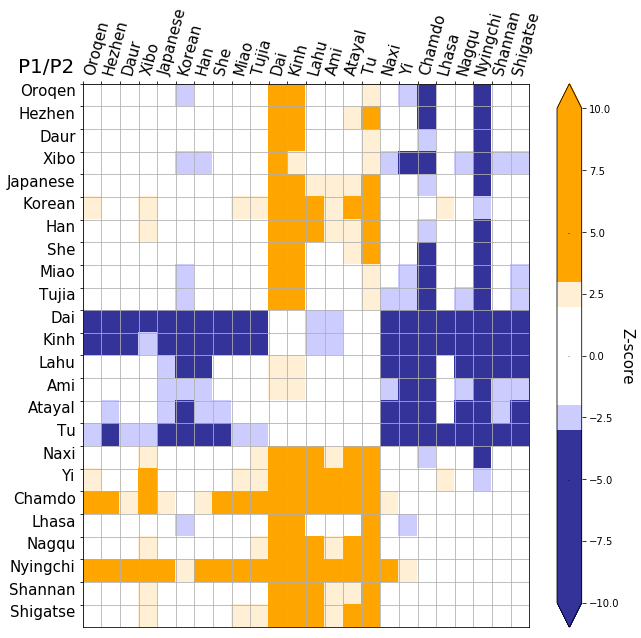

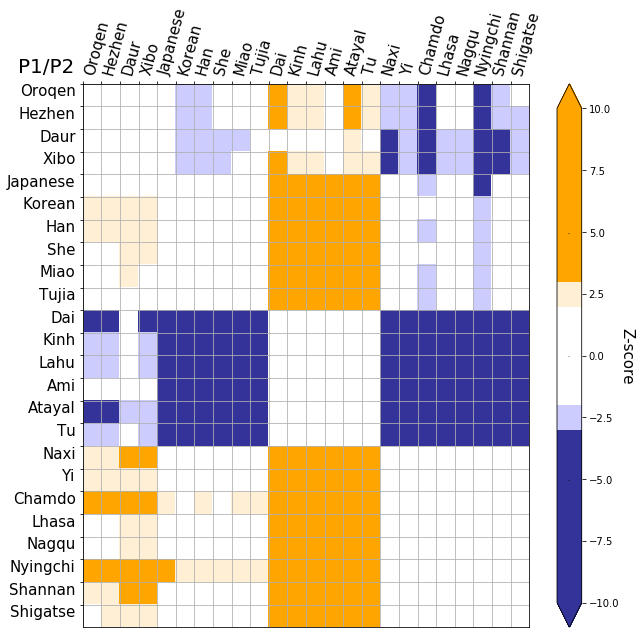

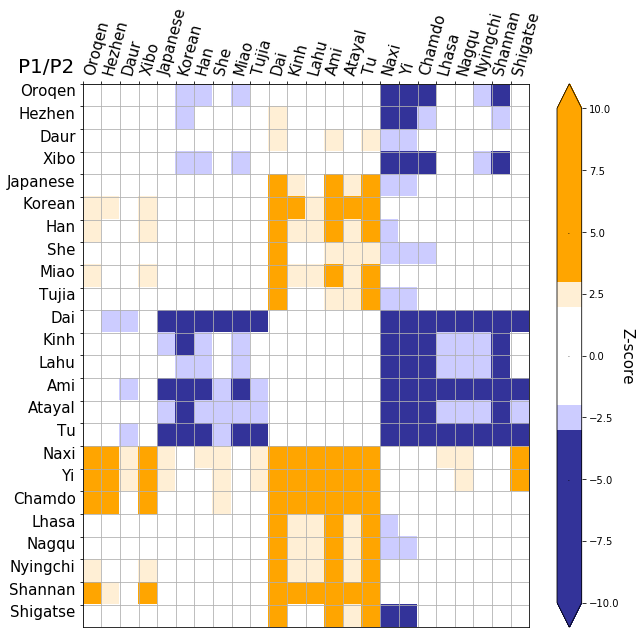

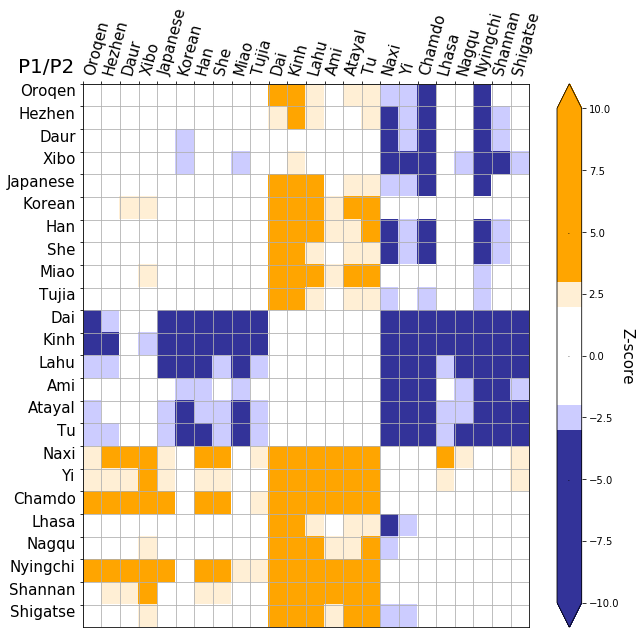

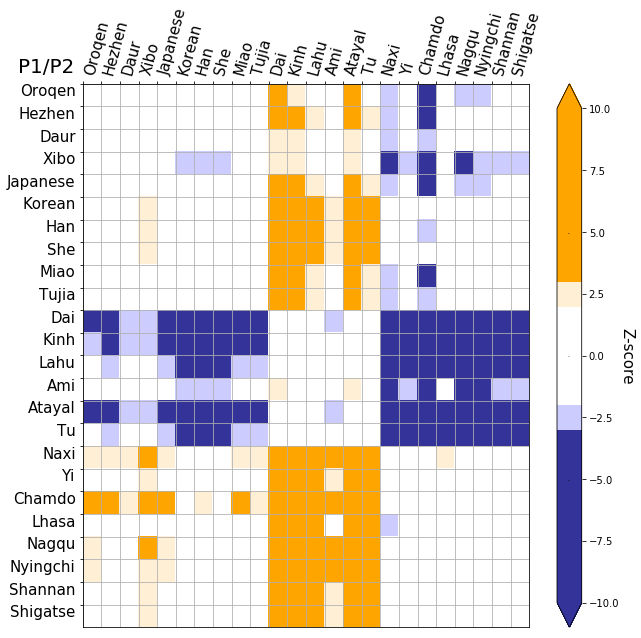

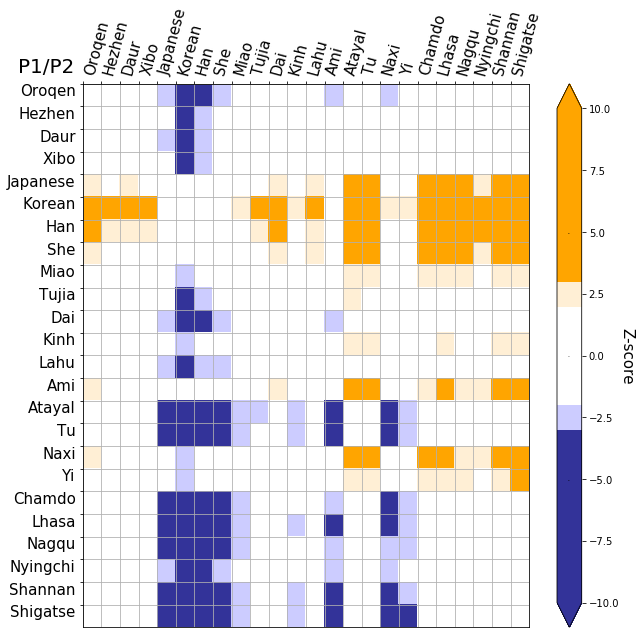

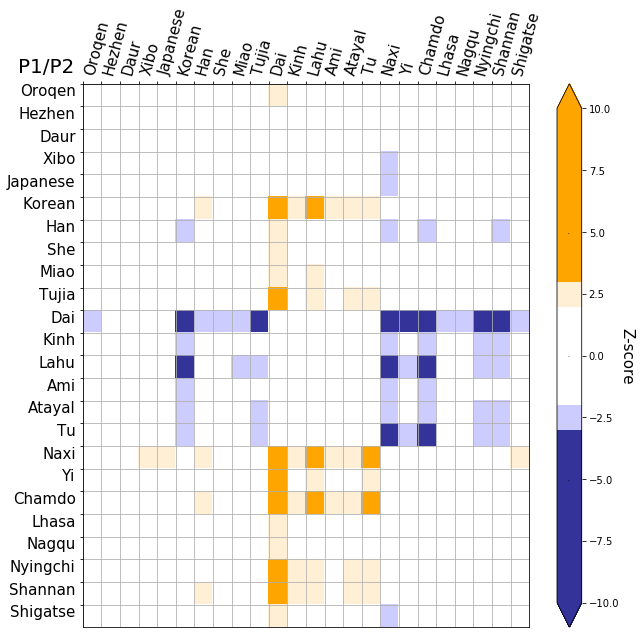

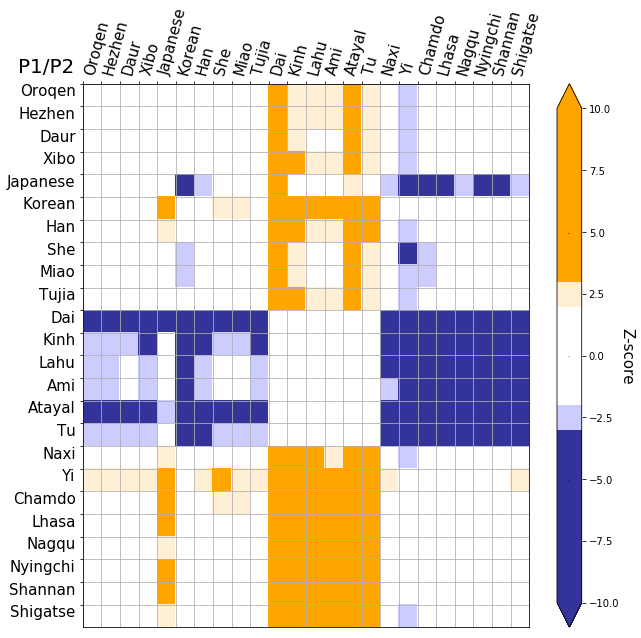

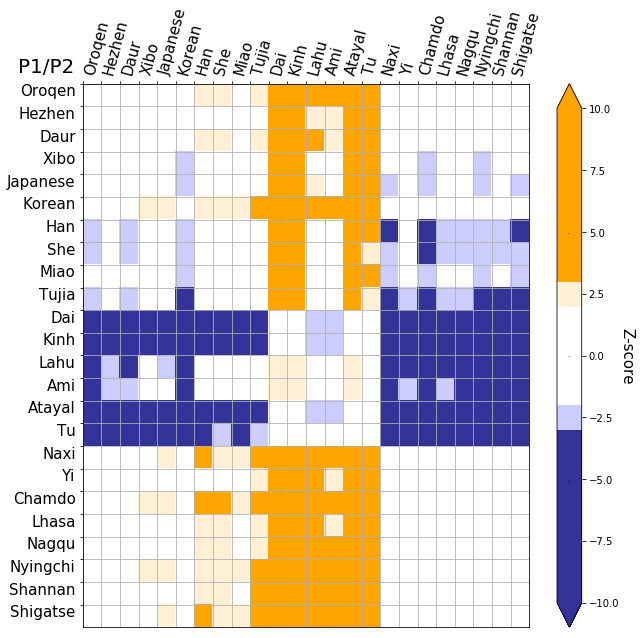

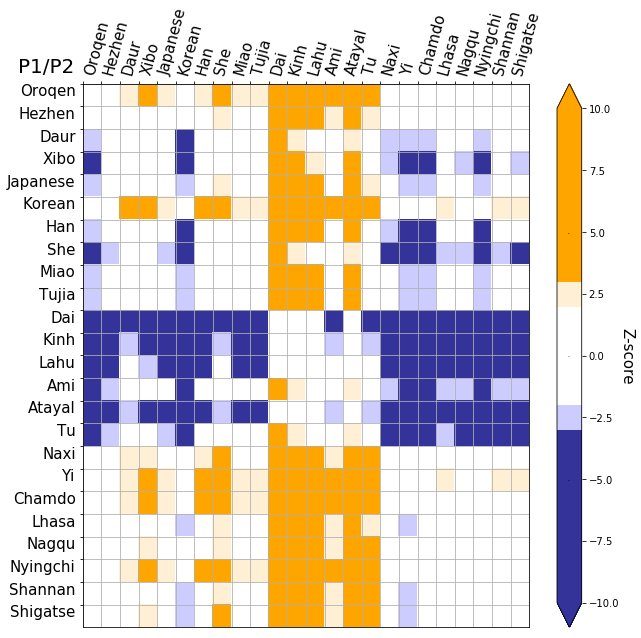

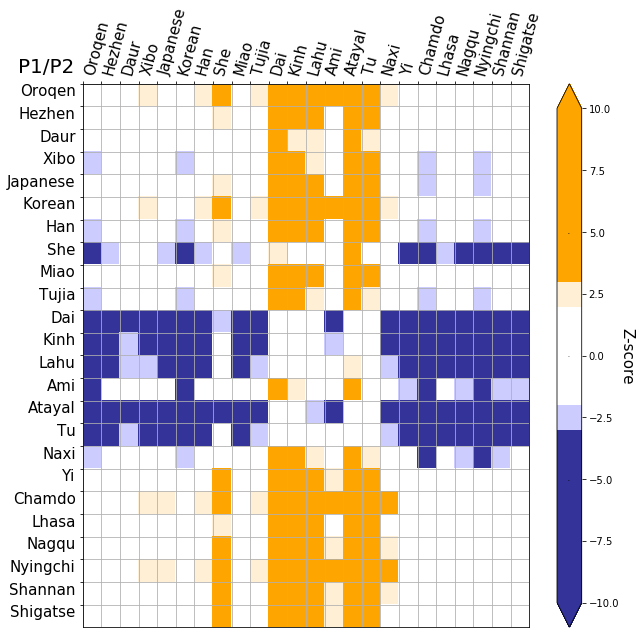

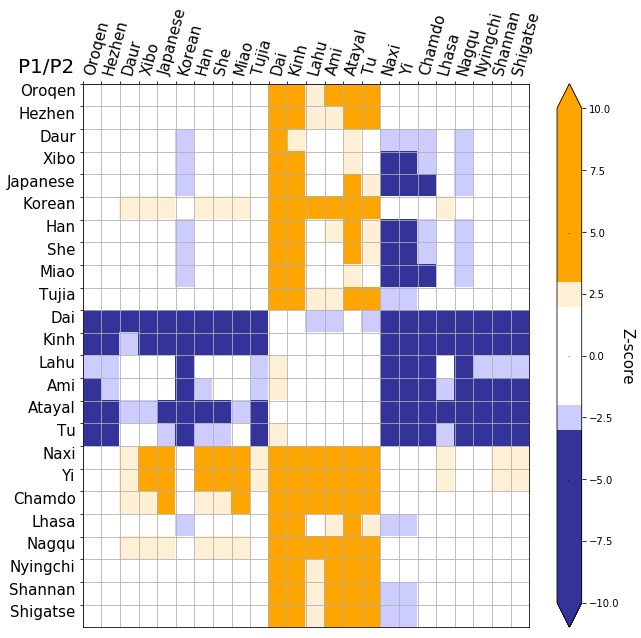

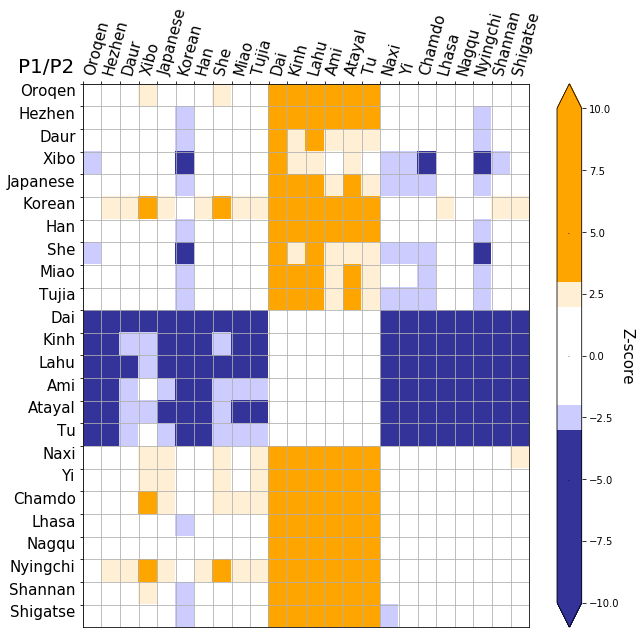

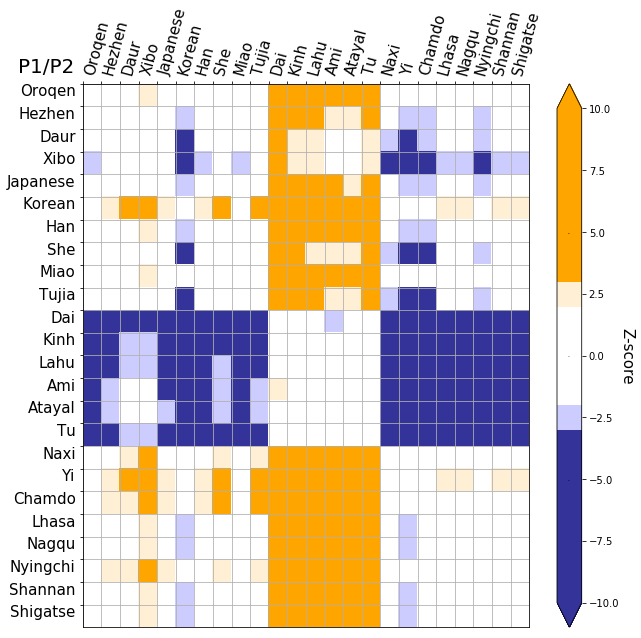

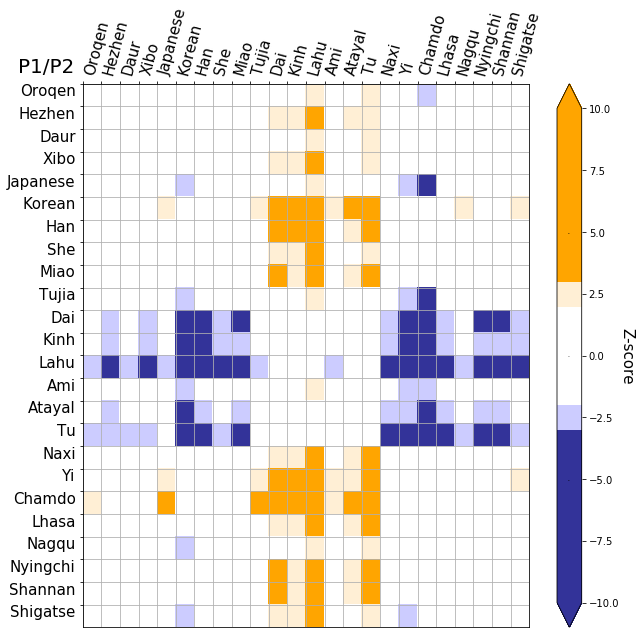

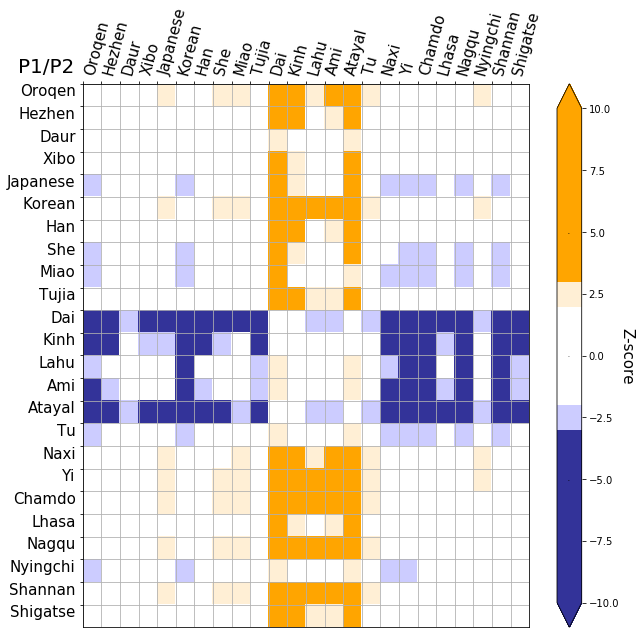

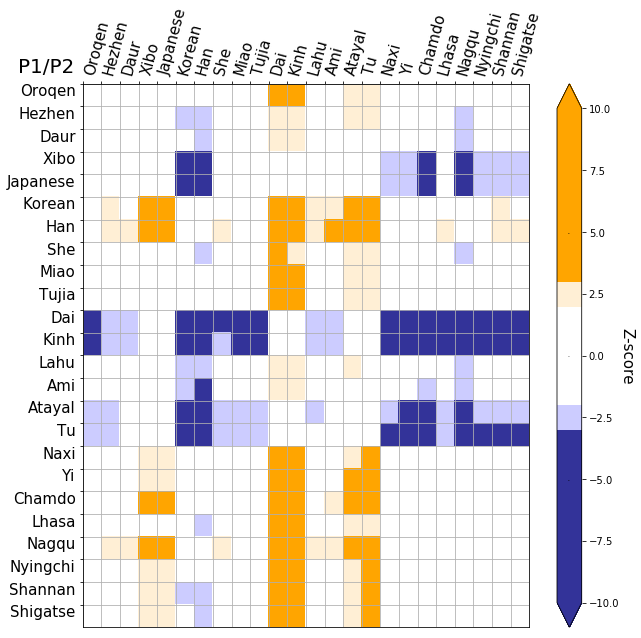

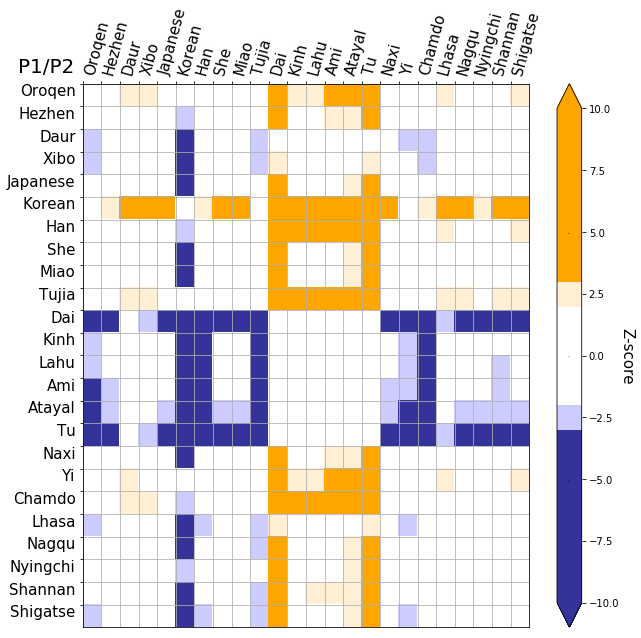

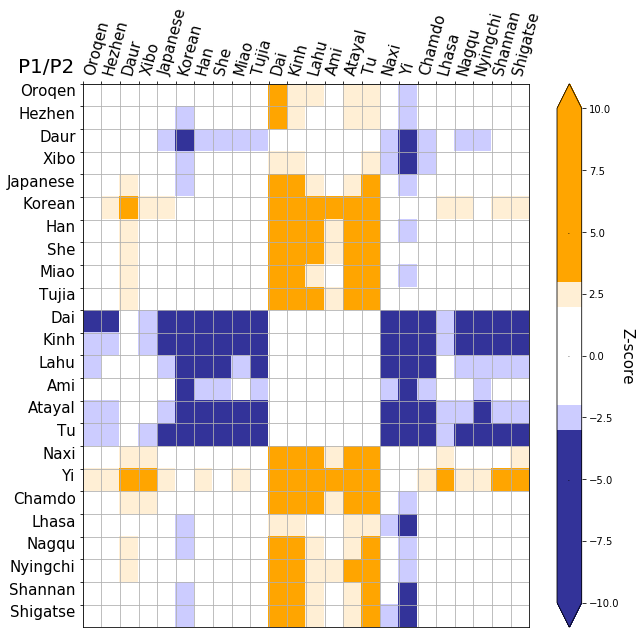

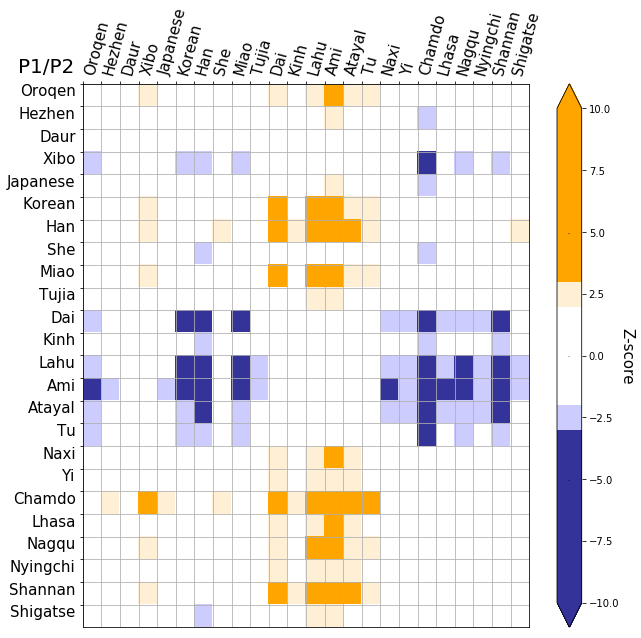

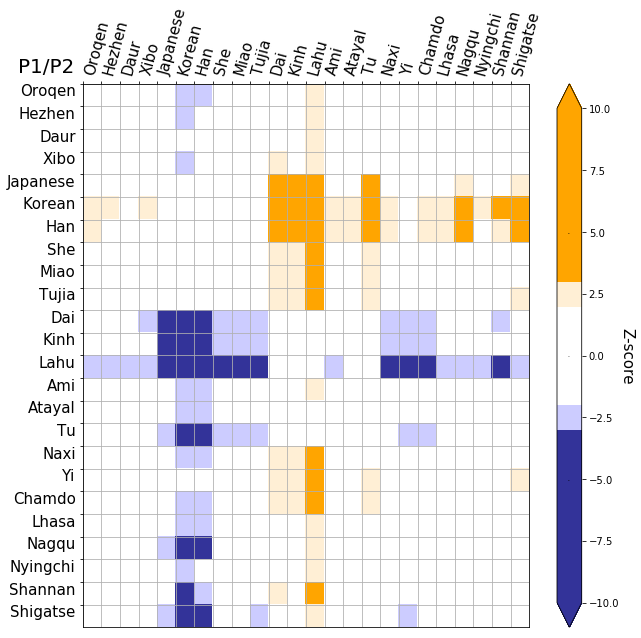

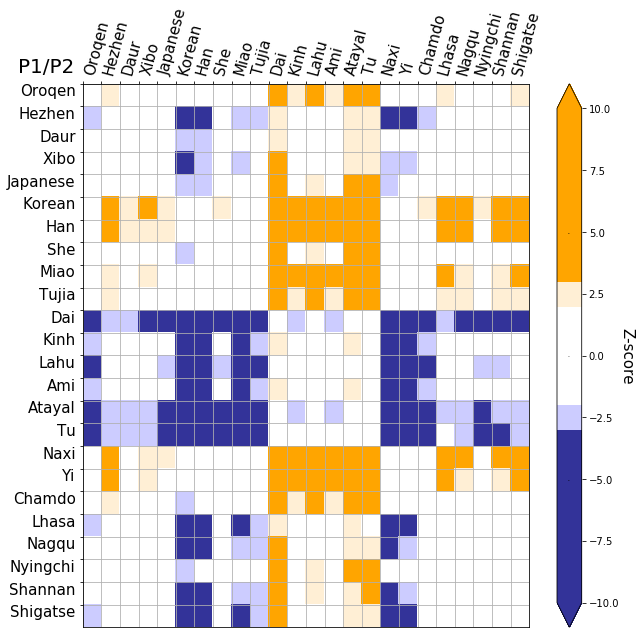

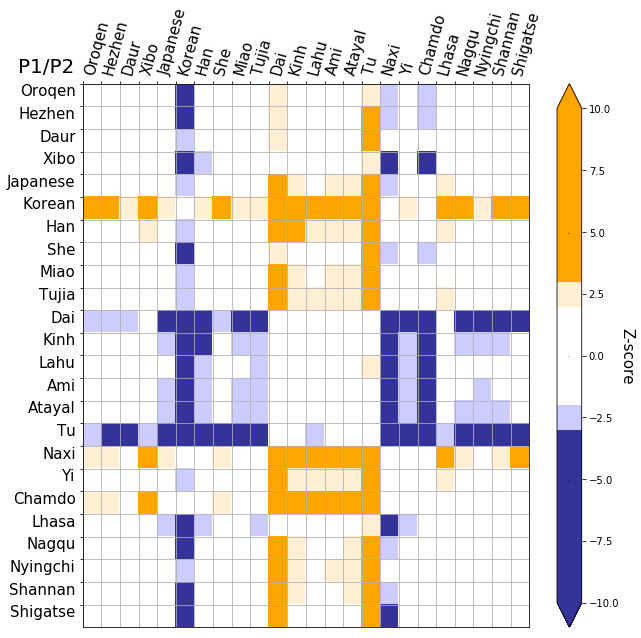

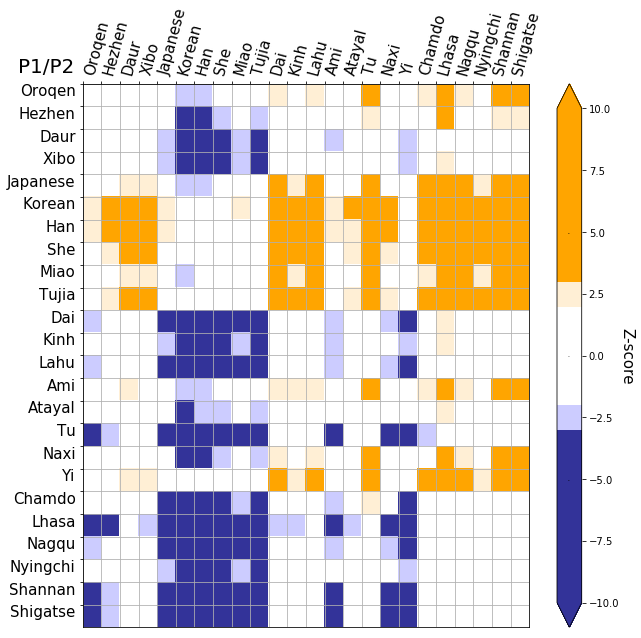

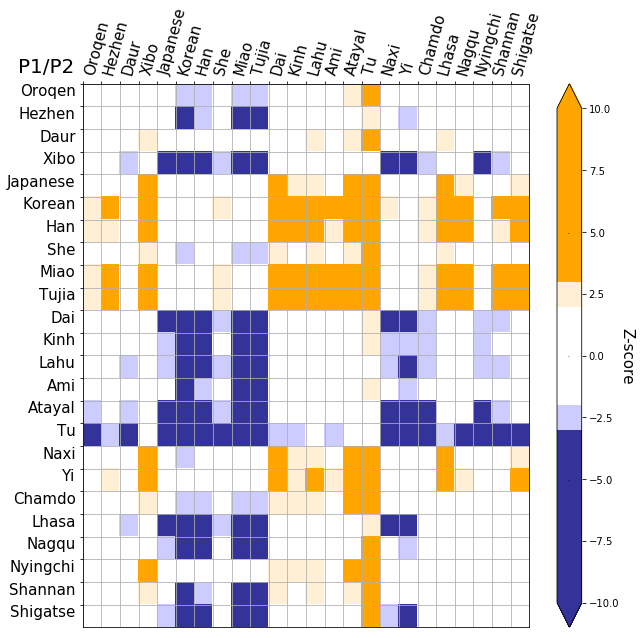

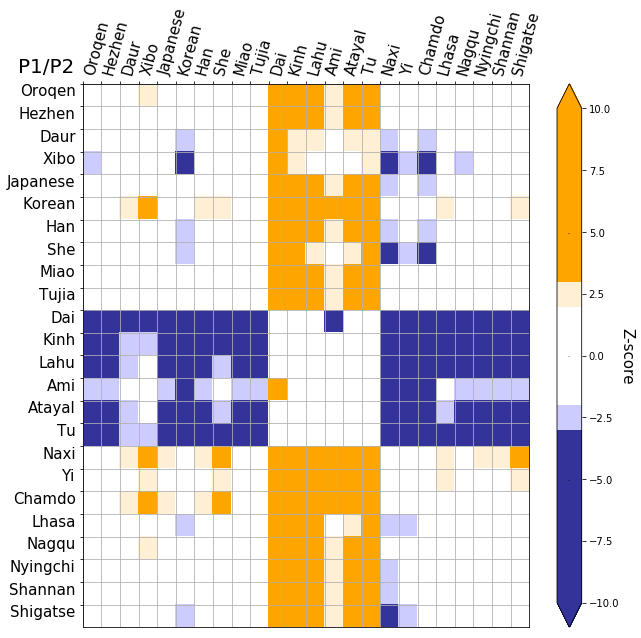

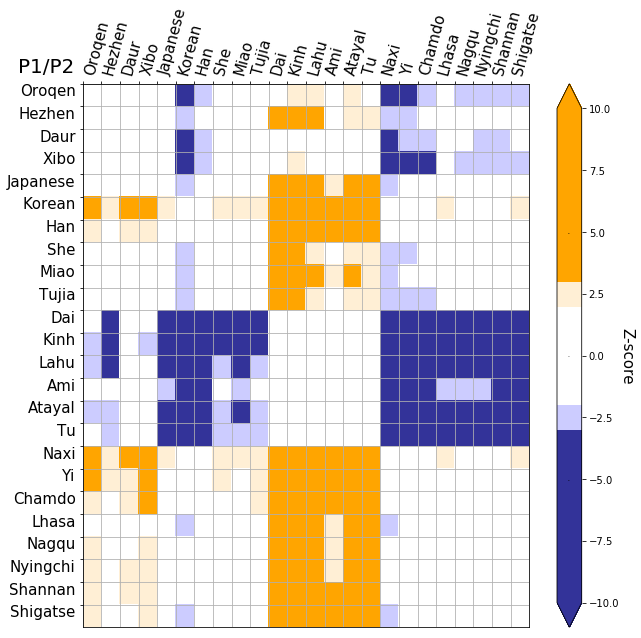

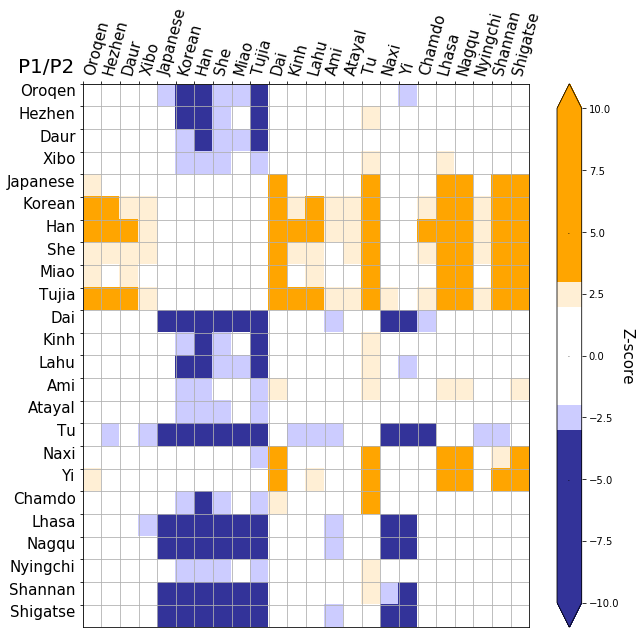

Lierbao0


In [3]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
pD="/mnt/solexa/mel_yang/aPlateau/"
fh,tv=("complete.dstat.log","")
#fh,tv=("complete.tv.dstat.log",".tv")
fs=15
agq=["Zongri-a","ZongriM32","Zongri-c","ZongriM78","Zongri-b","ZongriM40","Hedong4","XiahaishiM22",
     "Hedong6","Hejiatai","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11","Hupo-a","Hupo14",
     "Shangluzhuang0","Hupo8","Qunke1","Lajigai-a","Lajigai2","Wenpuju03","Jinchankou0",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2","Wuba","HuoshaogouM117","Lierbao0"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Tu","Naxi","Yi"] #,"Tibetan","Sherpa"
tib=["Tibetan_Chamdo","Tibetan_Lhasa","Tibetan_Nagqu","Tibetan_Nyingchi","Tibetan_Shannan","Tibetan_Shigatse"]
tibnames=["Chamdo","Lhasa","Nagqu","Nyingchi","Shannan","Shigatse"]
header1,header2=eas+tibnames,eas+tibnames
popA=eas+tib
popB=eas+tib
myinds=agq
outs=["Mbuti","Chimp"]
out="Mbuti"
#out="Chimp"
for count,myind in enumerate(myinds):
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"
    newname="D_EASTIB_EASTIB_%s_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops2,(2,3),(0,1),'Z')
    Dary = pm.mkDary(pD,fh,mypops2,(2,3),(0,1),'D')
    mylabel="D(%s,%s;%s,%s)" % ('P1',"P2",myind,out)
    Zary = np.nan_to_num(Zary)
    
    levels = range(-10,11)
    multiplier=((len(levels)-6)/2)+1
    colors = ['#333399']*multiplier + ['#CCCCFF'] + ['white']*4 + ['#FFEFD5'] + ['orange']*multiplier
    cmap1,norm = matplotlib.colors.from_levels_and_colors(levels, colors,extend='both')
    
    fig,ax = plt.subplots(figsize=(10,10))
    heatmap = ax.pcolor(Zary ,cmap=cmap1, vmin=-10,vmax=10)
    cbar=plt.colorbar(heatmap)
    
    ##LEGEND
    cbar.ax.text(.5, 0.25, '$D<0$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.text(.5, 0.5, '$N.S.$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.text(.5, 0.75, '$D>0$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Z-score', rotation=270,fontsize=fs)
    
    ax.grid(True)
    ax.set_xticks(np.arange(len(header1)), minor=False)
    ax.set_yticks(np.arange(len(header2)), minor=False)
    
    column_labels = header1
    row_labels = header2
    ax.set_xlim((0,len(header1)))
    ax.set_ylim((0,len(header2)))
    ax.set_xticklabels(column_labels, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(row_labels, minor=False,fontsize=fs,va='top')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.text(-3.5,-0.5,"P1/P2",fontsize=fs+5)
    newfilename='/mnt/solexa/mel_yang/aPlateau/images/SI_BB/rev_%s%s_heatmap.png' % (newname,tv)
    print newfilename
    fig.savefig(newfilename)
    
plt.show()
print myind